<a href="https://colab.research.google.com/github/YujiSue/BioInfoTools/blob/master/BioInfoTools_Template_ja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

English version is [here](https://github.com/YujiSue/BioInfoTools/blob/master/BioInfoTools_Template.ipynb).   
# このノートブックについて
このノートは私が研究用にC++で書いたバイオインフォマティクスのプログラムを、Google Colab上で利用するためのものです。

# 使用手順
1. 必要なライブラリをインストールします。  
※一度インストールしたライブラリは、Colabのセッション終了時に消えてしまいます。  
  Google Colabにアクセスして新規セッションを始める場合は、必ずこのステップを実行してください。
  
2. それぞれのセクションに記載した手順に従って、各アプリをインストールし、実行してください。

# 1. 必要なライブラリのインストール
下セルを実行してください。

In [ ]:
!wget https://raw.githubusercontent.com/YujiSue/slib/master/include/sconfig.h
!wget https://raw.githubusercontent.com/YujiSue/slib/master/include/sobj.h
!wget https://raw.githubusercontent.com/YujiSue/Lemegeton/master/Goetia.h
!wget https://raw.githubusercontent.com/YujiSue/Lemegeton/master/Goetia.cpp
!g++ -std=c++11 -Wall -O2 -o ./Goetia Goetia.cpp
import os
os.environ['PATH'] += ':/usr/local/lib' 
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/lib'
os.system('./Goetia -sOAI')

# 2-1. GenomeConverterを使う

##  インストール
下セルを実行してください。


In [ ]:
!mkdir -p Codes
!wget https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/GenomeConverter/GenomeConverter.cpp -O Codes/GenomeConverter.cpp
!g++ -std=c++11 -I/usr/local/include/slib -L/usr/local/lib -O2 -o GenomeConverter Codes/GenomeConverter.cpp -lsapp -lsbioinfo -lsobj -lcurl

## 使用例 (H.sapiens)

i. ゲノム配列(FASTA形式)をダウンロードして展開します。

In [ ]:
!curl -O ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/405/GCF_000001405.39_GRCh38.p13/GCF_000001405.39_GRCh38.p13_genomic.fna.gz
!gzip -d GCF_000001405.39_GRCh38.p13_genomic.fna.gz

ii. アプリを実行します。

> ファイル"GCF_000001405.39_GRCh38.p13_genomic.fna"  
> を以下の設定で変換します。  
>> 種名：H. sapiens  
>> バージョン：GRCh38.p13  
>> 染色体（リンケージグループ）のみを対象  
>> "human.bin"として保存  

In [ ]:
!./GenomeConverter -l -s "H. sapiens" -r GRCh38.p13 -o human.bin GCF_000001405.39_GRCh38.p13_genomic.fna

loading 'GCF_000001405.39_GRCh38.p13_genomic.fna'
exporting... 'human.bin'
Completed.


## 使用例 (C.elegans)

i. ゲノム配列(FASTA形式)をダウンロードして展開します。

In [ ]:
!curl -O ftp://ftp.wormbase.org/pub/wormbase/species/c_elegans/sequence/genomic/c_elegans.PRJNA13758.current.genomic.fa.gz
!gzip -d c_elegans.PRJNA13758.current.genomic.fa.gz

ii. アプリを実行します。

> ファイル"c_elegans.PRJNA13758.current.genomic.fa"  
> を以下の設定で変換します。 
>> 種名：C. elegans  
>> バージョン：WS274  
>> 染色体（リンケージグループ）のみを対象  
>> "nematode.bin"として保存   

In [ ]:
!./GenomeConverter -l -s "C. elegans" -r WS274 -o nematode.bin c_elegans.PRJNA13758.current.genomic.fa

loading 'c_elegans.PRJNA13758.current.genomic.fa'
exporting... 'nematode.bin'
Completed.


## ヘルプコマンド

In [ ]:
!./GenomeConverter --help

GenomeConverter v1.1.0
Copyright (c) 2015 Yuji Suehiro. All rights reserved. 
MIT license.
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

Usage:
  GenomeConverter -o 'output' input(s) { -l } { -s name } { -r version }
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

[Option]
  --linkage/-l        :  Select only linkaged sequence.
  --out/-o            : *Output file path.
  --refver/-r         :  Reference version.
  --species/-s        :  Species.

  --help/-H           : Show help.
  --version/-V        : Show version.
  --info/-I           : Show app information.

  * Required option.
  # Choose one of the options.


# 2-2. Use GenomeExtract

##  Installation
Execute the following commands.

In [ ]:
!mkdir -p Codes
!wget https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/GenomeExtract/GenomeExtract.cpp -O Codes/GenomeExtract.cpp
!g++ -std=c++11 -I/usr/local/include/slib -L/usr/local/lib -O2 -o GenomeExtract Codes/GenomeExtract.cpp -lsapp -lsbioinfo -lsobj -lcurl

## Usage example (H.sapiens)
* Prepare the encoded genomic sequence file using the GenomeConverter.  
  
> From human genome,   
> extract complemented sequence  
> from 7687k to 7688k  
> in the 17th chromosome  
> as fasta format.

In [ ]:
!./GenomeExtract -r human.bin -f fa --rev 17:7687000..7688000

>17:7687000..7688000
TTTCGAGATCCAAAAGTCTCAGACCTCAATGCTTTGTGCATCTTTTATTTCAGGGATTCC
CTACGCCCAGCACCGGGTGGATGTGCAAAGAAGTACGCTTTAGGCCGGCTCAAGGTTCCC
CAAAGCTCCACTCCTCTGCCTAGGCGTTCAACTTTGAGTTCGGATGGTCCTAACATCCCC
ATCATCTACACCCAGGTCTCCCAACAATGCAACTCCTATGATGATCCCTCTAGCCAAGCT
TCCATCCCACTCACCCCCAAACTCGCTAAGTCCCCACTGCCCCACCCCCAGCCCCAGCGA
TTTTCCCGAGCTGAAAATACACGGAGCCGAGAGCCCGTGACTCAGAGAGGACTCATCAAG
TTCAGTCAGGAGCTTACCCAATCCAGGGAAGCGTGTCACCGTCGTGGAAAGCACGCTCCC
AGCCCGAACGCAAAGTGTCCCCGGAGCCCAGCAGCTACCTGCTCCCTGGACGGTGGCTCT
AGACTTTTGAGAAGCTCAAAACTTTTAGCGCCAGTCTTGAGCACATGGGAGGGGAAAACC
CCAATCCCATCAACCCCTGCGAGGCTCCTGGCACAAAGCTGGACAGTCGCCATGACAAGT
AAGGGCAAGTAATCCGCCTGCCGGAGGAAGCAAAGGAAATGGAGTTGGGGAGGAGGGTGC
AGAGTCAGGATTCTCGCCGACCTGGTGCCGTAGATACTAACATTTTGGGGTGGAAAATTC
TGCAAGCCAGAGCTGTGAGGGCAGAATTGGTGGAAATCATTTTGGAGGAATCCTGCATTG
TGTCAAATATGAAGGGTGGAAGGAAGAAAGCTTTTGCGTTTGCTCTCAGCTGGATCCTTT
CTTCTCATCAGTTAAAATGTCATTTTTTAGGAAGGCTTTCCGTAATATCACACCCTAACG
TTTTCTCCCAGATACTTTATATCACACCATCTTATTTAATCTCCTTCACAACCCTTATCA
CTC

## Usage example (C.elegans)
* Prepare the encoded genomic sequence file using the GenomeConverter.  
  
> From nematode genome,   
> extract sequence  
> from 1234567 to 1234789  
> in the chromosome III  
> as text format.

In [ ]:
!./GenomeExtract -r nematode.bin -f txt III:1234567..1234789

AAAAATTCACATTGAAAATTTTGGGTCCTACCACGAACACTTACGGGGTACTGTAGACTTGACAAAGCAACTAGATCATACGTTTTTTTTTCTACAGTAATCCAAAAAAAATCAAAAATCTTTATTCAAAAAAATCTCAAATCTAAAAACAACAAACTCAAAAAATTAATCGAATTTTATTTTTAACCTTAAATTAATTTTTTTTTCCAATTACCCCACATAC


## Help

In [ ]:
!./GenomeExtract --help

GenomeExtract v1.1.0
Copyright (c) 2015 Yuji Suehiro. All rights reserved. 
MIT license
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

Usage:
  GenomeExtract -r file position(s) { -f txt/fa } { --rev }
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

[Option]
  --format/-f         :  File format to display or export.
  --ref/-r            : *Reference file path.
  --rev               :  Get reverse strand seq.

  --help/-H           : Show help.
  --version/-V        : Show version.
  --info/-I           : Show app information.

  * Required option.
  # Choose one of the options.


# 2-3. Use GFFParser

##  Installation
Execute the following commands.

In [ ]:
!mkdir -p Codes
!wget https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/GFFParser/GFFParser.cpp -O Codes/GFFParser.cpp
!g++ -std=c++11 -I/usr/local/include/slib -L/usr/local/lib -O2 -o GFFParser Codes/GFFParser.cpp -lsapp -lsbioinfo -lsobj -lcurl

## Usage example (H.sapiens)

1. Download gff3 file

In [ ]:
!curl -O ftp://ftp.ensembl.org/pub/release-99/gff3/homo_sapiens/Homo_sapiens.GRCh38.99.chr.gff3.gz
!gzip -d Homo_sapiens.GRCh38.99.chr.gff3.gz

2. Execute the app.

In [ ]:
!./GFFParser Homo_sapiens.GRCh38.99.chr.gff3

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 39.3M  100 39.3M    0     0  11.2M      0  0:00:03  0:00:03 --:--:-- 11.2M
gzip: Homo_sapiens.GRCh38.99.chr.gff3 already exists; do you wish to overwrite (y or n)? y
havana	gene	["description","logic_name","ID","gene_id","biotype","version"]
havana	three_prime_UTR	["Parent"]
havana	unconfirmed_transcript	["ID","Parent","tag","Name","biotype","transcript_support_level","version","transcript_id"]
havana	C_gene_segment	["ID","Parent","tag","Name","biotype","transcript_support_level","version","transcript_id"]
havana	V_gene_segment	["ID","Parent","tag","Name","biotype","transcript_support_level","version","transcript_id"]
havana	snoRNA	["ID","Parent","tag","Name","biotype","transcript_support_level","version","transcript_id"]
havana	pseudogenic_transcript	["ID","Parent","tag","Name","biotype","transcript_support_level","version","

# 2-4. Use AnnotDBMaker

## Installation of main program

In [ ]:
!mkdir -p Codes
!wget https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/AnnotDBMaker/AnnotDBMake.cpp -O Codes/AnnotDBMake.cpp
!wget https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/AnnotDBMaker/DBMaker.cpp -O Codes/DBMaker.cpp
!wget https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/AnnotDBMaker/DBMaker.h -O Codes/DBMaker.h
!g++ -std=c++11 -I/usr/local/include/slib -I. -L/usr/local/lib -O2 -o AnnotDBMake Codes/AnnotDBMake.cpp Codes/DBMaker.cpp -lsapp -lsbioinfo -lsobj -lcurl -ldl

## Installation of Plug-ins

In [ ]:
## For human
!wget https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/AnnotDBMaker/HSDBMaker/HSDBMaker.cpp -O Codes/HSDBMaker.cpp
!g++ -std=c++11 -I/usr/local/include/slib -fPIC -ldl -lpthread -O2 -c Codes/HSDBMaker.cpp
!g++ -std=c++11 -shared -o human.plugin HSDBMaker.o
!rm HSDBMaker.o

In [ ]:
## For nematode (C.elegans)
!wget https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/AnnotDBMaker/CEDBMaker/CEDBMaker.cpp -O Codes/CEDBMaker.cpp
!g++ -std=c++11 -I/usr/local/include/slib -fPIC -ldl -lpthread -O2 -c Codes/CEDBMaker.cpp
!g++ -std=c++11 -shared -o nematode.plugin CEDBMaker.o
!rm CEDBMaker.o

## Usage example (H.sapiens)
* Prepare the binary genome reference encoded by GenomeConverter, GFF3 file, and other additional information files.
* This app also require a Plug-in (shared library / dynamic link library) tailored to each species' dataset.

i. Download gff3 annotation file.

In [ ]:
!curl -O ftp://ftp.ensembl.org/pub/release-99/gff3/homo_sapiens/Homo_sapiens.GRCh38.99.chr.gff3.gz
!gzip -d Homo_sapiens.GRCh38.99.chr.gff3.gz

ii. Execute the app.  
  
> Create database from GFF3 file "Homo_sapiens.GRCh38.99.chr.gff3"  
> using human's genomic sequence  
> and Plug-in "human.plugin" generated in the above code  
> with the following properties.  
>> Database version is GRCh38.99.  
>> Species is Homo sapiens.  
>> Saved as human.db.

In [ ]:
!./AnnotDBMake -r human.bin -p ./human.plugin -g Homo_sapiens.GRCh38.99.chr.gff3 -d GRCh38.99 -s "Homo sapiens" -o human.db

## Usage example (C.elegans)
* Prepare the binary genome reference encoded by GenomeConverter, GFF3 file, and other additional information files.
* This app also require a Plug-in (shared library / dynamic link library) tailored to each species' dataset.

i. Download gff3 annotation file and some additional files.

In [ ]:
!curl -O ftp://ftp.wormbase.org/pub/wormbase/species/c_elegans/PRJNA13758/gff/c_elegans.PRJNA13758.WS274.annotations.gff3.gz
!curl -O ftp://ftp.wormbase.org/pub/wormbase/species/c_elegans/PRJNA13758/annotation/geneIDs/c_elegans.PRJNA13758.WS274.geneIDs.txt.gz
!curl -O ftp://ftp.wormbase.org/pub/wormbase/species/c_elegans/PRJNA13758/annotation/functional_descriptions/c_elegans.PRJNA13758.WS274.functional_descriptions.txt.gz
!gzip -d c_elegans.PRJNA13758.WS274.annotations.gff3.gz
!gzip -d c_elegans.PRJNA13758.WS274.geneIDs.txt.gz
!gzip -d c_elegans.PRJNA13758.WS274.functional_descriptions.txt.gz

ii. Execute the app.
  
> Create database from GFF3 file "c_elegans.PRJNA13758.WS274.annotations.gff3"  
> using nematode's genomic sequence  
> and Plug-in "nematode.plugin" generated in the above code  
> with the following properties.  
>> Database version is WS274.  
>> Species is Caenorhabditis elegans.  
>> Use additional files  
>> "c_elegans.PRJNA13758.WS274.geneIDs.txt"  
>> and "c_elegans.PRJNA13758.WS274.functional_descriptions.txt".  
>> Saved as nematode.db.

In [ ]:
!./AnnotDBMake -r nematode.bin -p ./nematode.plugin -g c_elegans.PRJNA13758.WS274.annotations.gff3 -d WS274 -s "Caenorhabditis elegans" -e "gene:c_elegans.PRJNA13758.WS274.geneIDs.txt,description:c_elegans.PRJNA13758.WS274.functional_descriptions.txt" -o nematode.db

## Help

In [ ]:
!./AnnotDBMaker --help

AnnotDBMake v1.1.0
Copyright (c) 2015 Yuji Suehiro. All rights reserved. 
MIT License
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

Usage:
  AnnotDBMake -r file -p prog. -o output { -c creator } { -s name } { -e files } { -d version } { -a attribute } { -g file }
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

[Option]
  --attribute/-a      :  Database attribute (key1=value1;key2=value2;...).
  --creator/-c        :  Creator's name.
  --dbver/-d          :  Database version.
  --extra/-e          :  Extra data resource(tag1:file1,tag2:file2,...).
  --gff/-g            :  GFF3 file.
  --out/-o            : *Output file path.
  --program/-p        : *Dynamic library(.so/.dll) to make database for each species.
  --reference/-r      : *Reference file prepared by 'GenomeConverter'.
  --species/-s        :  Name of the species.

  --version/-V        : Show version.
  --info/-I           : Show app information.
  --help/-H           : Show help.

  * Required o

# 2-5. Use BioAnnotation

##  Installation
Execute the following commands.

In [ ]:
!mkdir -p Codes
!wget https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/BioAnnotation/BioAnnotation.cpp -O Codes/BioAnnotation.cpp
!g++ -std=c++11 -I/usr/local/include/slib -L/usr/local/lib -O2 -o BioAnnotation Codes/BioAnnotation.cpp -lsapp -lsbioinfo -lsobj -lcurl

## Usage example (H.sapiens)
* Prepare the database for annotation by AnnotDBMake  
  
> Using human.db as annotation database,
> get infotmation of chromosomal position
> from the gene name "TP53"

In [ ]:
!./BioAnnotation -d human.db -f gene -t pos TP53

TP53	>>	17:7661779..7687550(-)


## Usage example (C.elegans)
* Prepare the database for annotation by AnnotDBMake  
  
> Using nematode.db as annotation database,  
> get infotmation of mutants  
> from the gene name.

In [ ]:
!./BioAnnotation -d nematode.db -f gene -t mut cep-1

cep-1	>>	w40,gk138,ep347


## Help

In [ ]:
!./BioAnnotation --help

BioAnnot v1.1.0
Copyright (c) 2015 Yuji Suehiro. All rights reserved. 
MIT license.
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

Usage:
  BioAnnot -d database -f source(pos/gene/trs/mut) -t output(pos/gene/trs/mut) input { -s } { -g id/name }
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

[Option]
  --db/-d             : *Annotation database file path.
  --from/-f           : *Genomic position([Chr]:[Start]..[End]), Gene name, Transcript name, or Mutant name.
  --gtype/-g          :  Type of gene output(Unique gene ID, or Gene name.
  --to/-t             : *Genomic position([Chr]:[Start]..[End]), Gene name, Transcript name, or Mutant name.
  --tsite/-s          :  Show sites of transcripts (CDS/exon/intron/5'UTR/3'UTR).

  --help/-H           : Show help.
  --version/-V        : Show version.
  --info/-I           : Show app information.

  * Required option.
  # Choose one of the options.


# 2-6. Use GeneMapSVG

##  Installation
Execute the following commands.

In [ ]:
!mkdir -p Codes
!wget https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/GeneMapSVG/GeneMapSVG.cpp -O Codes/GeneMapSVG.cpp
!wget https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/GeneMapSVG/MakeMap.cpp -O Codes/MakeMap.cpp
!wget https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/GeneMapSVG/MakeMap.h -O Codes/MakeMap.h
!g++ -std=c++11 -I/usr/local/include/slib -I./Codes -L/usr/local/lib -O2 -o GeneMapSVG Codes/GeneMapSVG.cpp Codes/MakeMap.cpp -lsapp -lsbioinfo -lsobj -lcurl

## Usage example (H.sapiens)
* Prepare the encoded genomic sequence and the annotation database generated by GenomeConverter and AnnotDBMaker, respectively.

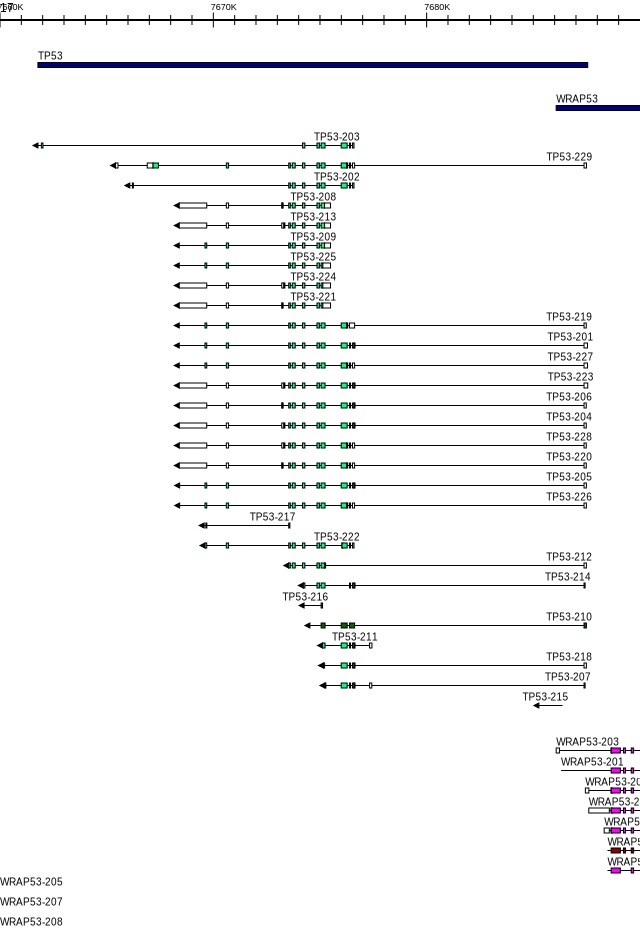

In [ ]:
!./GeneMapSVG -gt -a human.db -r human.bin -w 640 -p 17:7660000..7690000 -o map_HS.svg
from IPython.display import *
display_svg(SVG('map_HS.svg'))

## Help

In [ ]:
!./GeneMapSVG --help

MapSVG v1.1.0
Copyright (c) 2019 Yuji Suehiro. All rights reserved. 
MIT license
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

Usage:
  MapSVG -r file -a file -p position -w value -o file { -gmt }
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

[Option]
  --annot/-a          : *Annotation database file path.
  --gene/-g           :  Show genes positions.
  --mut/-m            :  Show mutations positions.
  --out/-o            : *File path to export.
  --pos/-p            : *Position to obtain the map.
  --ref/-r            : *Reference file path.
  --trs/-t            :  Show transcripts positions.
  --width/-w          : *Width of viewport.

  --help/-H           : Show help.
  --version/-V        : Show version.
  --info/-I           : Show app information.

  * Required option.
  # Choose one of the options.


# 2-7. Use VariantDetect

##  Installation
Execute the following commands.

In [ ]:
!mkdir -p Codes
!wget https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/VariantDetect/VariantDetect.cpp -O Codes/VariantDetect.cpp
!wget https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/VariantDetect/VarAnalyzer.cpp -O Codes/VarAnalyzer.cpp
!wget https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/VariantDetect/VarAnalyzer.h -O Codes/VarAnalyzer.h
!wget https://raw.githubusercontent.com/YujiSue/BioInfoTools/master/VariantDetect/VarSearch.cpp -O Codes/VarSearch.cpp
!g++ -std=c++11 -I/usr/local/include/slib -I./Codes -L/usr/local/lib -O2 -o VariantDetect Codes/VarAnalyzer.cpp Codes/VariantDetect.cpp Codes/VarSearch.cpp -lsapp -lsbioinfo -lsobj -lcurl

## Usage example (H.sapiens)
* Prepare the encoded genomic sequence by GenomeConverter

i. Get a test sequence (.fa)

In [ ]:
!wget https://drive.google.com/uc?id=1fjPJHbnU-42G8EvVE-dVefzv5mBTQ67c -O test.fa

ii. Execute the app.

 > 

In [ ]:
!./VariantDetect -r human.bin -i test.fa

8:19956191 (G->A substitution).


## Usage example (C.elegans)
* Prepare the encoded genomic sequence by GenomeConverter

i. Get a test sequence (.ab1)

In [ ]:
!wget https://drive.google.com/uc?id=1zD2uoiHrmVemxq_G18A0tHofQeyhGSVC -O test.ab1

ii. Execute the app.

In [ ]:
!./VariantDetect -r nematode.bin -i test.ab1

V:3937069-3937272 (204 bp deletion).


## Help

In [ ]:
!./VariantDetect --help

VariantDetect v1.1.0
Copyright (c) 2015 Yuji Suehiro. All rights reserved. 
MIT license.
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

Usage:
  VariantDetect -r file -i file(fa/txt/seq/ab1) { -m size } { -t value } { -g size } { -s size }
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

[Option]
  --gap/-g            :  Permissible gap size.
  --input/-i          : *Input file path.
  --match/-m          :  Minimum match size.
  --ref/-r            : *Reference file path.
  --seed/-s           :  Seed size.
  --threshold/-t      :  Threshold to extend alignemnt.

  --help/-H           : Show help.
  --version/-V        : Show version.
  --info/-I           : Show app information.

  * Required option.
  # Choose one of the options.
